<a href="https://colab.research.google.com/github/vaibhav-5-7/retail-insights-pandas-matplotlib/blob/main/Retail_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required libraries (if needed)
!pip install seaborn matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')


In [3]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv('/content/SampleSuperstore.csv')

# Preview the data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# Basic structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Check for missing values
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [10]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [11]:
# Summary of numerical columns
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [12]:
# Column names
print(df.columns)

# Sample rows
df.head(10)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


## Data Overview

In [45]:
# Display the first 5 rows
display(df.head())

# Display the last 5 rows
display(df.tail())

# Display the number of rows and columns
print("\nShape of the DataFrame:")
print(df.shape)

# Display the column names
print("\nColumn names:")
print(df.columns)

# Display data types and non-null counts
print("\nData types and non-null counts:")
df.info()

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
display(df.describe())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10,7


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,2017-05,7
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,2016-01,5
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,2016-01,5
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,2016-01,5
9799,9800,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,2016-01,5



Shape of the DataFrame:
(9789, 20)

Column names:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Month', 'Shipping Duration'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9789 non-null   int64         
 1   Order ID           9789 non-null   object        
 2   Order Date         9789 non-null   datetime64[ns]
 3   Ship Date          9789 non-null   datetime64[ns]
 4   Ship Mode          9789 non-null   object        
 5   Customer ID        9789 non-null   object        
 6   Customer Name      9789 non-null   object        
 7   Segment 

,Row ID,Order Date,Ship Date,Postal Code,Sales,Shipping Duration
count,9789.000000,9789,9789,9789.000000,9789.000000,9789.000000
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,230.116193,3.961181
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,0.000000
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000,3.000000
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000,4.000000
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000,5.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,7.000000
std,2827.486899,NaN,NaN,32041.223413,625.302079,1.750452


## Data Cleaning

In [ ]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Remove rows with missing 'Postal Code' values
df.dropna(subset=['Postal Code'], inplace=True)

# Check for duplicate rows
print("\nNumber of duplicate rows before cleaning:")
print(df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that missing values and duplicates are handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nNumber of duplicate rows after cleaning:")
print(df.duplicated().sum())

## Filtering Data

In [46]:
# Example 1: Filter for orders from California
california_sales_df = df[df['State'] == 'California']
print("Orders from California:")
display(california_sales_df.head())

# Example 2: Filter for sales above a certain amount (e.g., > 1000)
high_sales_df = df[df['Sales'] > 1000]
print("\nOrders with Sales > 1000:")
display(high_sales_df.head())

# Example 3: Filter for a specific category (e.g., 'Technology')
technology_df = df[df['Category'] == 'Technology']
print("\nOrders for Technology category:")
display(technology_df.head())

# Example 4: Combining multiple conditions (e.g., Furniture in the South region)
furniture_south_df = df[(df['Category'] == 'Furniture') & (df['Region'] == 'South')]
print("\nFurniture orders in the South region:")
display(furniture_south_df.head())

Orders from California:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2017-06,4
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,2015-06,5
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,2015-06,5
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,2015-06,5
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,2015-06,5



Orders with Sales > 1000:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,2015-06,5
24,25,CA-2016-106320,2016-09-25,2016-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,2016-09,5
27,28,US-2016-150630,2016-09-17,2016-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,2016-09,4
35,36,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,2017-12,2
54,55,CA-2017-105816,2017-12-11,2017-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,New York,10024.0,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950,2017-12,6



Orders for Technology category:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,2015-06,5
11,12,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,2015-06,5
19,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,2015-08,5
26,27,CA-2017-121755,2017-01-16,2017-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049.0,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,2017-01,4
35,36,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,2017-12,2



Furniture orders in the South region:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11,3
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10,7
72,73,US-2016-134026,2016-04-26,2016-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,Tennessee,38109.0,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,831.9360,2016-04,6
73,74,US-2016-134026,2016-04-26,2016-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,Tennessee,38109.0,South,FUR-FU-10003708,Furniture,Furnishings,Tenex Traditional Chairmats for Medium Pile Ca...,97.0400,2016-04,6


## Sorting Data

In [47]:
# Example 1: Sort by Sales in ascending order
sorted_by_sales_asc = df.sort_values(by='Sales', ascending=True)
print("DataFrame sorted by Sales (Ascending):")
display(sorted_by_sales_asc.head())

# Example 2: Sort by Sales in descending order
sorted_by_sales_desc = df.sort_values(by='Sales', ascending=False)
print("\nDataFrame sorted by Sales (Descending):")
display(sorted_by_sales_desc.head())

# Example 3: Sort by multiple columns (e.g., Region then Sales)
sorted_by_region_sales = df.sort_values(by=['Region', 'Sales'], ascending=[True, False])
print("\nDataFrame sorted by Region (Ascending) and then Sales (Descending):")
display(sorted_by_region_sales.head())

DataFrame sorted by Sales (Ascending):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
4101,4102,US-2018-102288,2018-06-19,2018-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,2018-06,4
9292,9293,CA-2018-124114,2018-03-02,2018-03-02,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,Texas,76706.0,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,2018-03,0
8658,8659,CA-2017-168361,2017-06-21,2017-06-25,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,Illinois,60623.0,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,2017-06,4
4711,4712,CA-2015-112403,2015-03-31,2015-03-31,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,2015-03,0
2106,2107,US-2015-152723,2015-09-26,2015-09-26,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,Texas,75150.0,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876,2015-09,0



DataFrame sorted by Sales (Descending):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
2697,2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,2015-03,5
6826,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,2017-10,7
8153,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,2018-03,2
2623,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,2018-10,2
4190,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,2018-11,5



DataFrame sorted by Region (Ascending) and then Sales (Descending):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Shipping Duration
6826,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,2017-10,7
9039,9040,CA-2017-117121,2017-12-17,2017-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205.0,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,2017-12,4
4098,4099,CA-2015-116904,2015-09-23,2015-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407.0,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,2015-09,5
165,166,CA-2015-139892,2015-09-08,2015-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207.0,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,2015-09,4
6520,6521,CA-2018-138289,2018-01-16,2018-01-18,Second Class,AR-10540,Andy Reiter,Consumer,United States,Jackson,Michigan,49201.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,2018-01,2


## Grouping & Aggregation

In [48]:
# Example 1: Calculate total sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum()
print("Total Sales by Region:")
display(sales_by_region)

# Example 2: Calculate average sales by Category
sales_by_category = df.groupby('Category')['Sales'].mean()
print("\nAverage Sales by Category:")
display(sales_by_category)

# Example 3: Calculate total sales by Segment
sales_by_segment = df.groupby('Segment')['Sales'].sum()
print("\nTotal Sales by Segment:")
display(sales_by_segment)

# Example 4: Calculate total sales by Sub-Category and sort
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Sub-Category (Sorted):")
display(sales_by_subcategory.head()) # Displaying head as there are many sub-categories

Total Sales by Region:


,Sales
Region,
Central,492646.9132
East,660589.3560
South,389151.4590
West,710219.6845



Average Sales by Category:


,Sales
Category,
Furniture,348.525277
Office Supplies,119.128041
Technology,456.274096



Total Sales by Segment:


,Sales
Segment,
Consumer,1.146708e+06
Corporate,6.822118e+05
Home Office,4.236874e+05



Total Sales by Sub-Category (Sorted):


,Sales
Sub-Category,
Phones,326487.698
Chairs,322107.531
Storage,217779.102
Tables,202810.628
Binders,200028.785


## Value Counts & Unique Values

In [49]:
# Example 1: Get value counts for 'Segment'
segment_counts = df['Segment'].value_counts()
print("Value Counts for Segment:")
display(segment_counts)

# Example 2: Get unique values in 'Region'
unique_regions = df['Region'].unique()
print("\nUnique Values in Region:")
display(unique_regions)

# Example 3: Get value counts for 'Ship Mode'
ship_mode_counts = df['Ship Mode'].value_counts()
print("\nValue Counts for Ship Mode:")
display(ship_mode_counts)

# Example 4: Get the number of unique values in 'State'
num_unique_states = df['State'].nunique()
print(f"\nNumber of unique States: {num_unique_states}")

Value Counts for Segment:


,count
Segment,
Consumer,5096
Corporate,2948
Home Office,1745



Unique Values in Region:


array(['South', 'West', 'Central', 'East'], dtype=object)


Value Counts for Ship Mode:


,count
Ship Mode,
Standard Class,5849
Second Class,1901
First Class,1501
Same Day,538



Number of unique States: 48


## Pivot Tables

In [50]:
# Create a pivot table to show total sales by Region and Category
sales_pivot = pd.pivot_table(df,
                             values='Sales',
                             index='Region',
                             columns='Category',
                             aggfunc='sum')

print("Pivot Table: Total Sales by Region and Category:")
display(sales_pivot)

Pivot Table: Total Sales by Region and Category:


Category,Furniture,Office Supplies,Technology
Region,,,
Central,160317.4622,163590.243,168739.208
East,201341.2880,197731.301,261516.767
South,116531.4800,124424.771,148195.208
West,245348.2455,217466.509,247404.930


## Correlation Analysis

Correlation Matrix:


,Row ID,Postal Code,Sales,Shipping Duration
Row ID,1.000000,0.013645,-0.000434,0.001018
Postal Code,0.013645,1.000000,-0.024067,-0.009443
Sales,-0.000434,-0.024067,1.000000,-0.005659
Shipping Duration,0.001018,-0.009443,-0.005659,1.000000


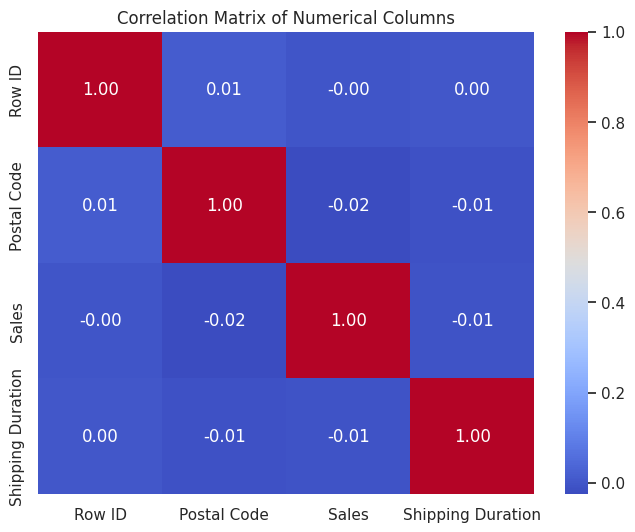

In [51]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Date-Based Analysis

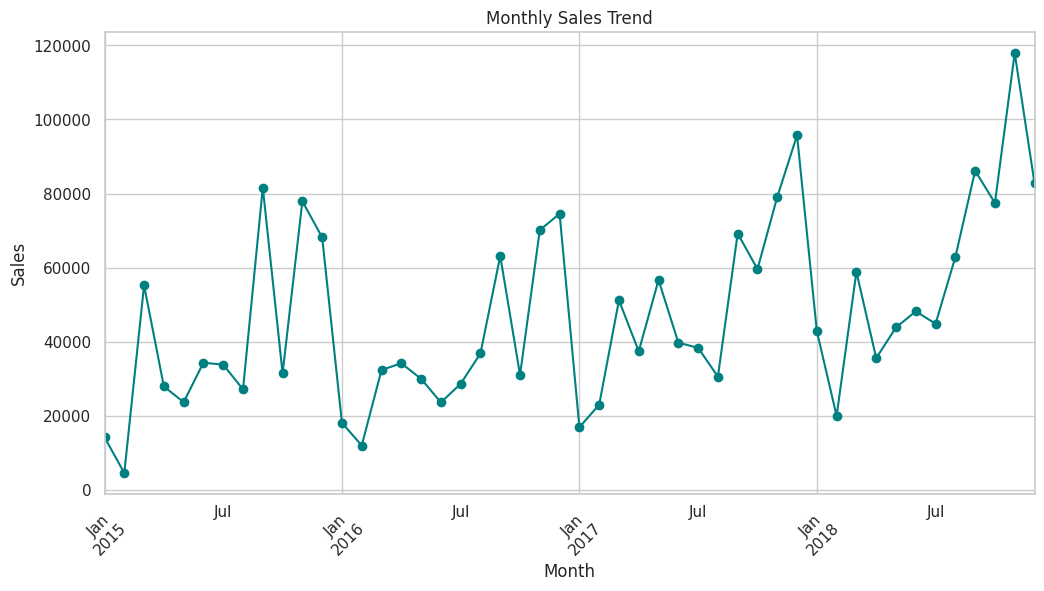


Total Sales by Year:


,Sales
Year,
2015,479856.2081
2016,454315.9054
2017,597225.4900
2018,721209.8092


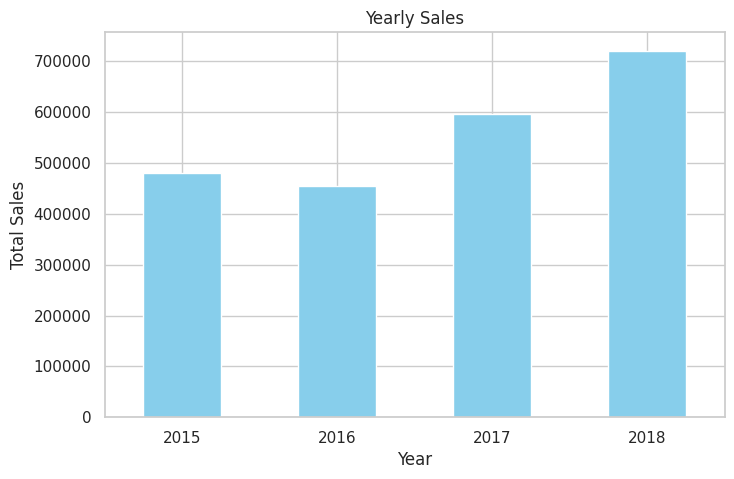

In [52]:
# Analyze monthly sales trend (using the 'Month' column created earlier)
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Analyze yearly sales
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum()

print("\nTotal Sales by Year:")
display(yearly_sales)

# Visualize yearly sales
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()